## Qs 2 - Design a Feed Forward Neural Network (FFN) for the following IRIS dataset.

### Importing necessary Libraries and preprocessing 

In [1]:
!pip install ucimlrepo

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
X = pd.read_csv('census_income.csv')
y = pd.read_csv('census_income_target.csv')
# from ucimlrepo import fetch_ucirepo
# census_income = fetch_ucirepo(id=20)



# X = census_income.data.features
# y = census_income.data.targets


In [4]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [5]:
X.to_csv('census_income.csv', index=False)
y.to_csv('census_income_target.csv', index=False)

In [6]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [7]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64

In [8]:
# Cleaning the target variable (y)
y = y.replace({'>50K.': '>50K', '<=50K.': '<=50K'})


In [9]:
y.value_counts()

income
<=50K     37155
>50K      11687
dtype: int64

### Preprocessing the dataset

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                    'race', 'sex', 'native-country']
le= LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

print(X.head())

X.info()




   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  
0              40              39  
1              13              39  
2              40              39  
3       

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)
y.shape

(48842,)

In [12]:
# Checking for missing values
print(X.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


It does not have any null values. 

### Doing some Exploratory Data analysis

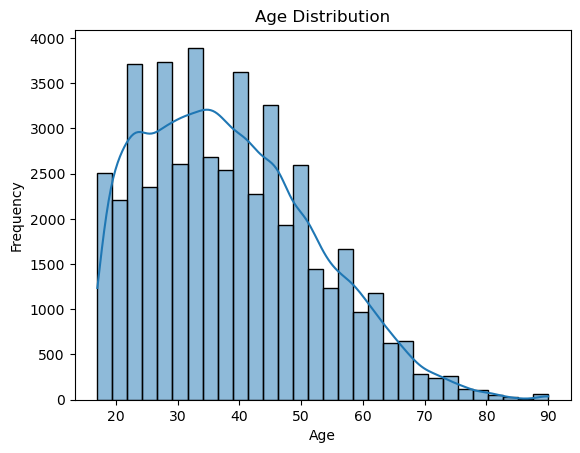

In [13]:

sns.histplot(X['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


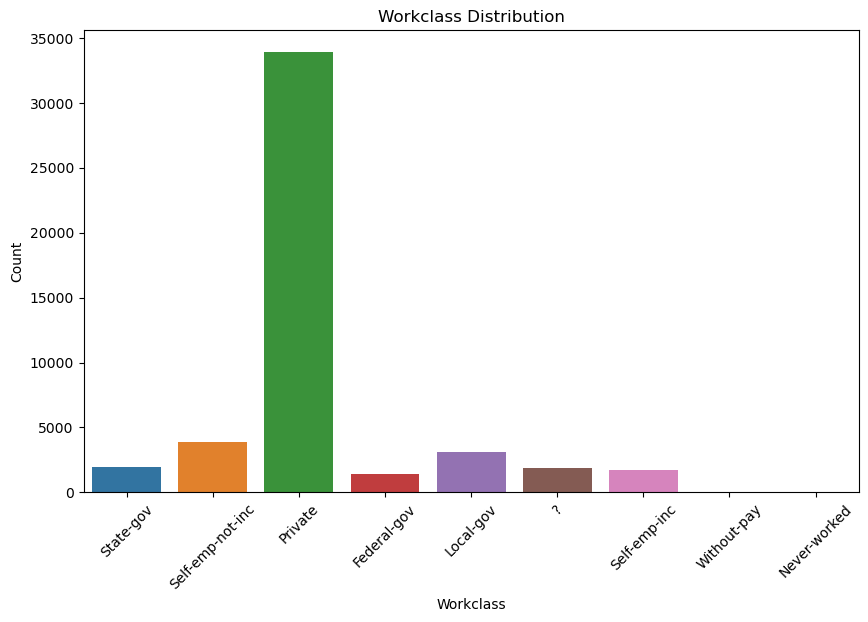

In [14]:
X['workclass_original'] = pd.read_csv('census_income.csv')['workclass']
plt.figure(figsize=(10, 6))
sns.countplot(x=X['workclass_original'])
plt.title('Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [15]:
X.drop('workclass_original', axis=1, inplace=True)

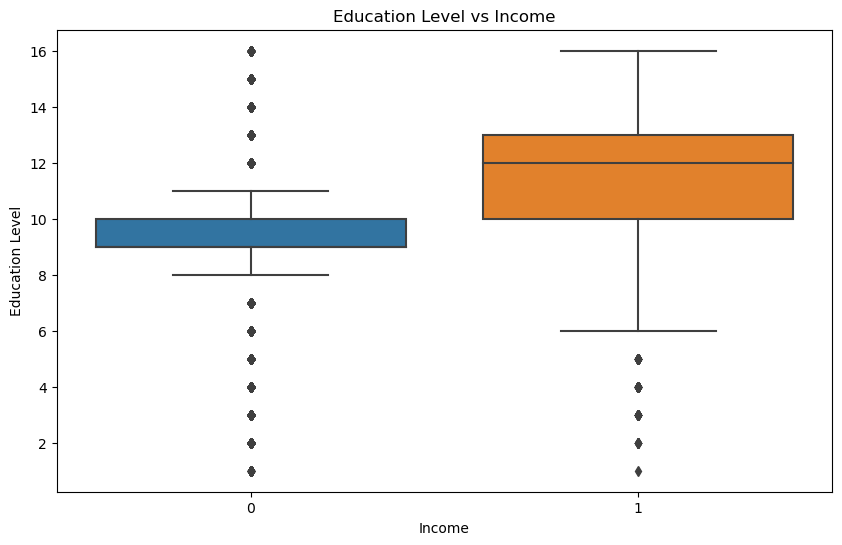

In [16]:
df_combined = X.copy()
df_combined['income'] = y

plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education-num', data=df_combined)
plt.title('Education Level vs Income')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.show()


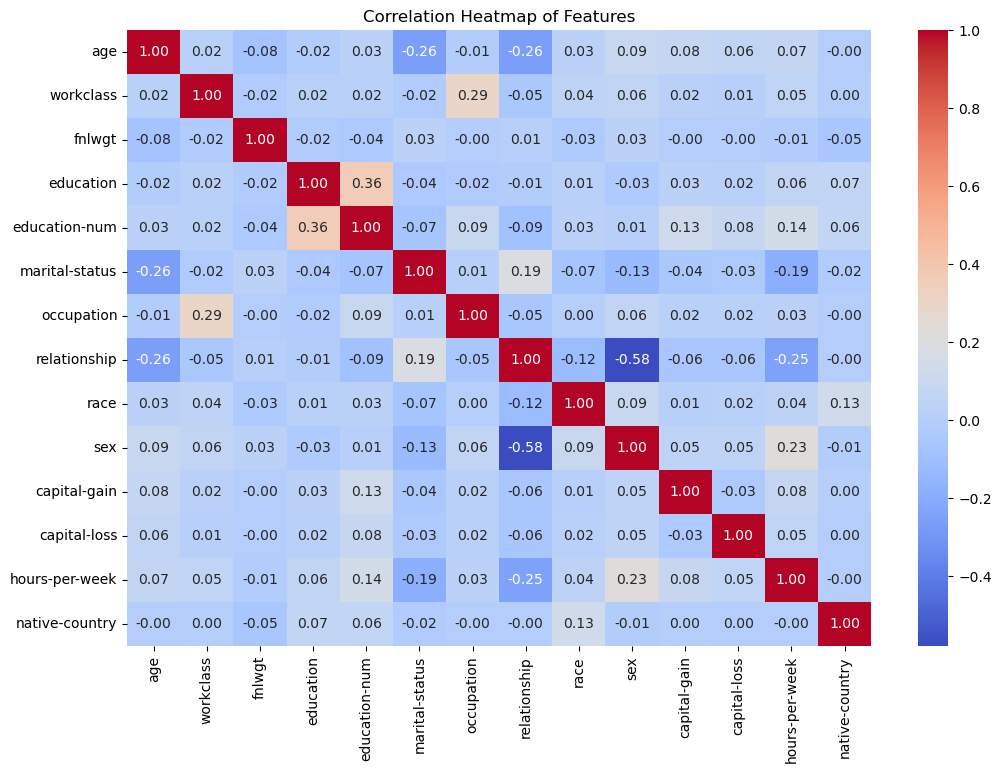

In [17]:

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


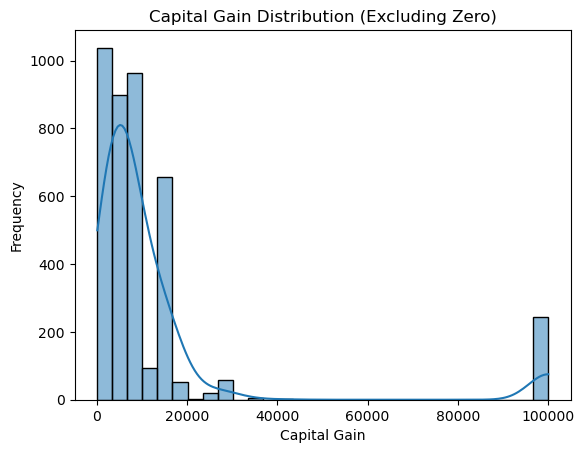

In [18]:

sns.histplot(X[X['capital-gain'] > 0]['capital-gain'], bins=30, kde=True)
plt.title('Capital Gain Distribution (Excluding Zero)')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()


#### Scaling the dataset

In [19]:
# Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X.shape

(48842, 14)

In [21]:
# Splitting the dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Creating the Feed Forward Neural Network Class. 

In [22]:
from sklearn.metrics import accuracy_score, classification_report

class FFN:
    def __init__(self, input_size, hidden_size, num_classes):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, num_classes) * 0.1
        self.b2 = np.zeros((1, num_classes))
    
    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    
    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[np.arange(m), y_true])
        return np.sum(log_likelihood) / m
    
    def forward(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.relu(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.softmax(Z2)
        return Z1, A1, Z2, A2
    
    def backward(self, X, y, Z1, A1, Z2, A2, learning_rate=0.1):
        m = X.shape[0]
        
        dZ2 = A2 - np.eye(A2.shape[1])[y]  
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def predict(self, X):
        _, _, _, A2 = self.forward(X)
        return np.argmax(A2, axis=1)

### Instantiating and Training the model 

In [23]:
nclasses = len(np.unique(y))

In [ ]:


# Model parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 16  # Number of neurons in the hidden layer
num_classes = len(np.unique(y_train))  # Number of classes


model = FFN(input_size, hidden_size, num_classes)

num_epochs = 200
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    Z1, A1, Z2, A2 = model.forward(X_train)

    loss = model.cross_entropy_loss(y_train, A2)

    model.backward(X_train, y_train, Z1, A1, Z2, A2)

    train_losses.append(loss)

    y_train_pred = model.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)

    train_accuracies.append(accuracy)
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')




Epoch [20/200], Loss: 0.5267, Accuracy: 0.7612
Epoch [40/200], Loss: 0.4869, Accuracy: 0.7649
Epoch [60/200], Loss: 0.4598, Accuracy: 0.7695
Epoch [80/200], Loss: 0.4364, Accuracy: 0.7827
Epoch [100/200], Loss: 0.4178, Accuracy: 0.7980
Epoch [120/200], Loss: 0.4043, Accuracy: 0.8103
Epoch [140/200], Loss: 0.3948, Accuracy: 0.8176
Epoch [160/200], Loss: 0.3877, Accuracy: 0.8207
Epoch [180/200], Loss: 0.3822, Accuracy: 0.8246
Epoch [200/200], Loss: 0.3774, Accuracy: 0.8265


In [137]:

y_pred = model.predict(X_test)
overall_accuracy = accuracy_score(y_test, y_pred)

print(f"\nOverall Test Accuracy: {overall_accuracy:.4f}")

\
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate class-wise accuracy
class_wise_accuracy = []
classes = sorted(set(y_test)) 

for class_index in classes:
    class_total = sum([1 for label in y_test if label == class_index])
    class_correct = sum([1 for i, label in enumerate(y_test) if label == class_index and y_pred[i] == class_index])
    class_accuracy = class_correct / class_total * 100
    class_wise_accuracy.append((class_index, class_accuracy))
    print(f"Class {class_index} Accuracy: {class_accuracy:.2f}%")


Overall Test Accuracy: 0.8246

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7414
           1       0.71      0.47      0.56      2355

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Class 0 Accuracy: 93.81%
Class 1 Accuracy: 46.75%


### Plotting Loss / Epoch and Accuracy / Epoch

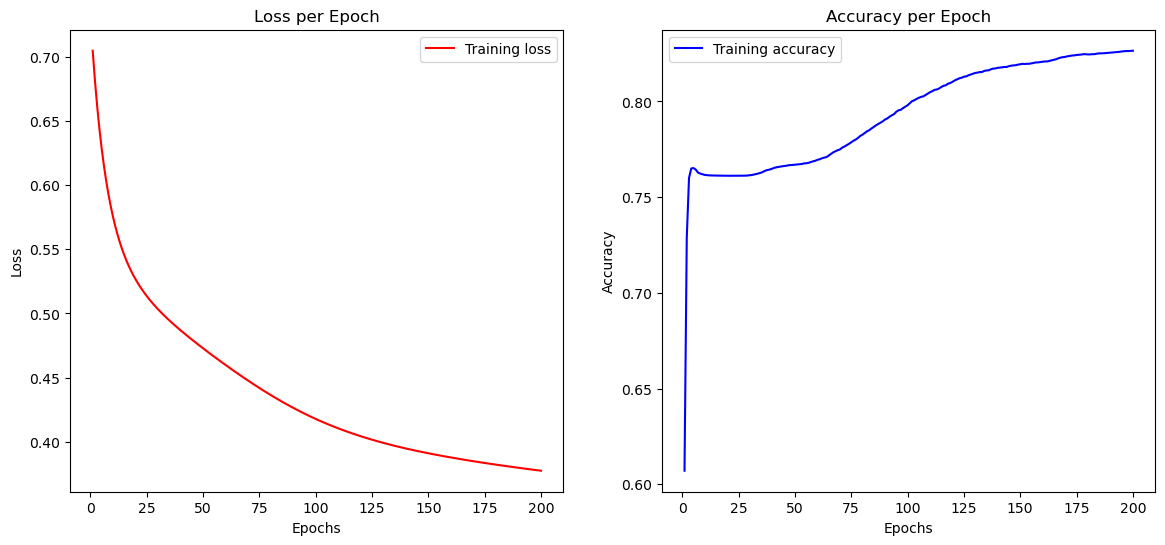

In [138]:


epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 6))

# Loss graph 
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'r', label='Training loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b', label='Training accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Performing Oversampling and again training the model. 

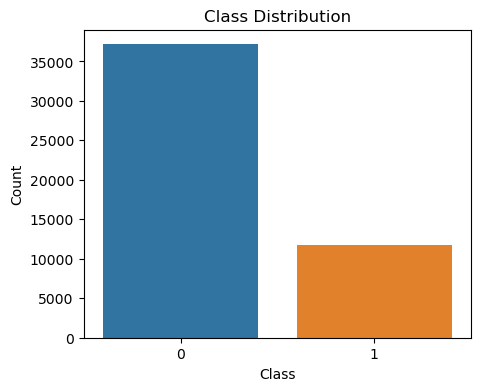

In [34]:
# Just show number of samples in each class using a bar plot
plt.figure(figsize=(5, 4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


From the plot, we can see that we have a class imbalance due to which our model gives us less prediction accuracy for class 1. 

Hence, we apply oversampling for our data and train the model again. 


In [28]:
from imblearn.over_sampling import SMOTE


# Applying SMOTE to the training set
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [26]:


# Model parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 16  # Number of neurons in the hidden layer
num_classes = len(np.unique(y_train))  # Number of classes


# Now, re-initialize the model
model = FFN(input_size, hidden_size, num_classes)


# Retrain the model using the resampled data
num_epochs = 200
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    Z1, A1, Z2, A2 = model.forward(X_resampled)

    loss = model.cross_entropy_loss(y_resampled, A2)

    model.backward(X_resampled, y_resampled, Z1, A1, Z2, A2)

    train_losses.append(loss)

    y_train_pred = model.predict(X_resampled)

    accuracy = accuracy_score(y_resampled, y_train_pred)

    train_accuracies.append(accuracy)
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Evaluate on the test set
y_pred = model.predict(X_test)
overall_accuracy = accuracy_score(y_test, y_pred)

print(f"\nOverall Test Accuracy after SMOTE: {overall_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

classes = sorted(set(y_test)) 

# Class-wise accuracy after oversampling
class_wise_accuracy = []
for class_index in classes:
    class_total = sum([1 for label in y_test if label == class_index])
    class_correct = sum([1 for i, label in enumerate(y_test) if label == class_index and y_pred[i] == class_index])
    class_accuracy = class_correct / class_total * 100
    class_wise_accuracy.append((class_index, class_accuracy))
    print(f"Class {class_index} Accuracy after SMOTE: {class_accuracy:.2f}%")


Epoch [20/200], Loss: 0.6383, Accuracy: 0.7195
Epoch [40/200], Loss: 0.5740, Accuracy: 0.7504
Epoch [60/200], Loss: 0.5240, Accuracy: 0.7629
Epoch [80/200], Loss: 0.4942, Accuracy: 0.7701
Epoch [100/200], Loss: 0.4769, Accuracy: 0.7732
Epoch [120/200], Loss: 0.4661, Accuracy: 0.7747
Epoch [140/200], Loss: 0.4583, Accuracy: 0.7767
Epoch [160/200], Loss: 0.4519, Accuracy: 0.7790
Epoch [180/200], Loss: 0.4462, Accuracy: 0.7816
Epoch [200/200], Loss: 0.4409, Accuracy: 0.7849

Overall Test Accuracy after SMOTE: 0.7803

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      7414
           1       0.53      0.80      0.64      2355

    accuracy                           0.78      9769
   macro avg       0.73      0.79      0.74      9769
weighted avg       0.83      0.78      0.79      9769

Class 0 Accuracy after SMOTE: 77.45%
Class 1 Accuracy after SMOTE: 79.87%


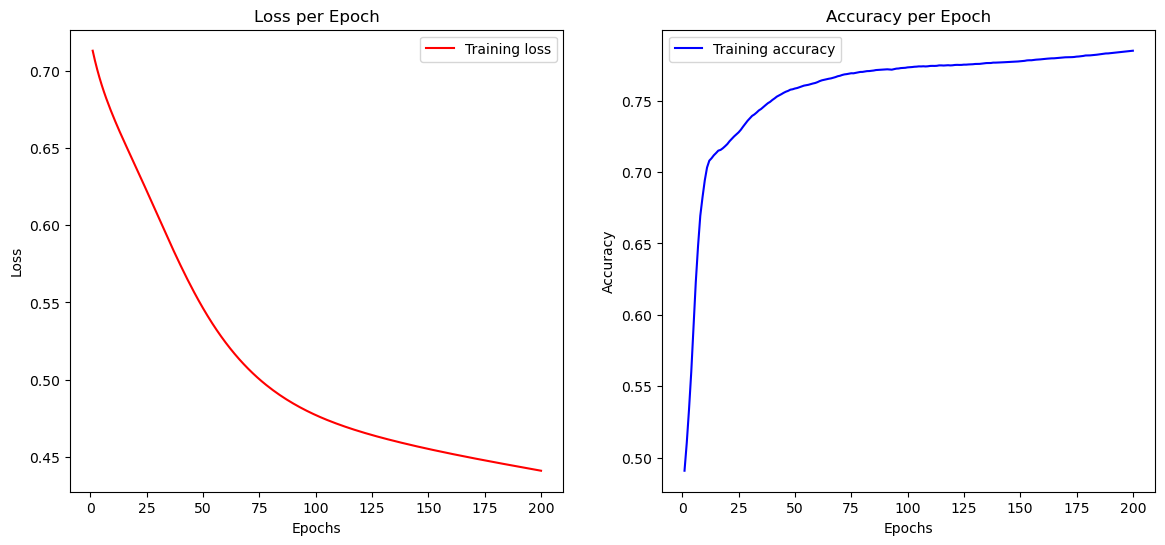

In [29]:


epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 6))

# Loss graph 
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'r', label='Training loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph 
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b', label='Training accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Finding Best parameters using Grid Search 

In [139]:
def train_and_evaluate(hidden_size, learning_rate, num_epochs):
    model = FFN(input_size, hidden_size, num_classes)
    
    for epoch in range(num_epochs):
        Z1, A1, Z2, A2 = model.forward(X_train)
        loss = model.cross_entropy_loss(y_train, A2)
        model.backward(X_train, y_train, Z1, A1, Z2, A2, learning_rate)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


param_grid = {                               # Defining the hyperparameter grid
    'hidden_size': [8, 16, 32],
    'learning_rate': [0.01, 0.1, 1],
    'num_epochs': [50, 100,150]
}

# Grid searching to find the best parameters
best_accuracy = 0
best_params = {}

for hidden_size in param_grid['hidden_size']:
    for learning_rate in param_grid['learning_rate']:
        for num_epochs in param_grid['num_epochs']:
            print(f"Testing hidden_size={hidden_size}, learning_rate={learning_rate}, num_epochs={num_epochs}")
            accuracy = train_and_evaluate(hidden_size, learning_rate, num_epochs)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'hidden_size': hidden_size,
                    'learning_rate': learning_rate,
                    'num_epochs': num_epochs
                }

print("Best Parameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")

Testing hidden_size=8, learning_rate=0.01, num_epochs=50
Testing hidden_size=8, learning_rate=0.01, num_epochs=100
Testing hidden_size=8, learning_rate=0.01, num_epochs=150
Testing hidden_size=8, learning_rate=0.1, num_epochs=50
Testing hidden_size=8, learning_rate=0.1, num_epochs=100
Testing hidden_size=8, learning_rate=0.1, num_epochs=150
Testing hidden_size=8, learning_rate=1, num_epochs=50
Testing hidden_size=8, learning_rate=1, num_epochs=100
Testing hidden_size=8, learning_rate=1, num_epochs=150
Testing hidden_size=16, learning_rate=0.01, num_epochs=50
Testing hidden_size=16, learning_rate=0.01, num_epochs=100
Testing hidden_size=16, learning_rate=0.01, num_epochs=150
Testing hidden_size=16, learning_rate=0.1, num_epochs=50
Testing hidden_size=16, learning_rate=0.1, num_epochs=100
Testing hidden_size=16, learning_rate=0.1, num_epochs=150
Testing hidden_size=16, learning_rate=1, num_epochs=50
Testing hidden_size=16, learning_rate=1, num_epochs=100
Testing hidden_size=16, learning_

## Repeating the Process using Pytorch and Verifying Results. 

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Creating Dataloader for the training and test set
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the Feed Forward Neural Network (FFN)
class FFN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FFN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


input_size = X.shape[1]  # Number of features
hidden_size = 16 # Number of neurons in the hidden layer
num_classes = nclasses  # Number of classes


model = FFN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)






In [131]:
train_losses = []
train_accuracies = []

num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    epoch_loss = 0
    
    for i, (features, labels) in enumerate(train_loader):
        outputs = model(features)
        loss = criterion(outputs, labels)
        epoch_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_losses.append(epoch_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())
    
    overall_accuracy = accuracy_score(y_true, y_pred)
    print(f"\nOverall Test Accuracy: {overall_accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['<=50K', '>50K']))
    
    class_wise_accuracy = []
    for class_index, class_name in enumerate(['<=50K', '>50K']):
        class_total = sum([1 for label in y_true if label == class_index])
        class_correct = sum([1 for i, label in enumerate(y_true) if label == class_index and y_pred[i] == class_index])
        class_accuracy = class_correct / class_total * 100
        class_wise_accuracy.append((class_name, class_accuracy))
        print(f"{class_name} Accuracy: {class_accuracy:.2f}%")


Epoch [5/50], Loss: 0.3113, Accuracy: 85.38%
Epoch [10/50], Loss: 0.3109, Accuracy: 85.42%
Epoch [15/50], Loss: 0.3108, Accuracy: 85.39%
Epoch [20/50], Loss: 0.3104, Accuracy: 85.34%
Epoch [25/50], Loss: 0.3101, Accuracy: 85.39%
Epoch [30/50], Loss: 0.3102, Accuracy: 85.43%
Epoch [35/50], Loss: 0.3100, Accuracy: 85.43%
Epoch [40/50], Loss: 0.3094, Accuracy: 85.42%
Epoch [45/50], Loss: 0.3095, Accuracy: 85.44%
Epoch [50/50], Loss: 0.3093, Accuracy: 85.49%

Overall Test Accuracy: 0.8530

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7414
        >50K       0.74      0.60      0.66      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

<=50K Accuracy: 93.32%
>50K Accuracy: 60.04%


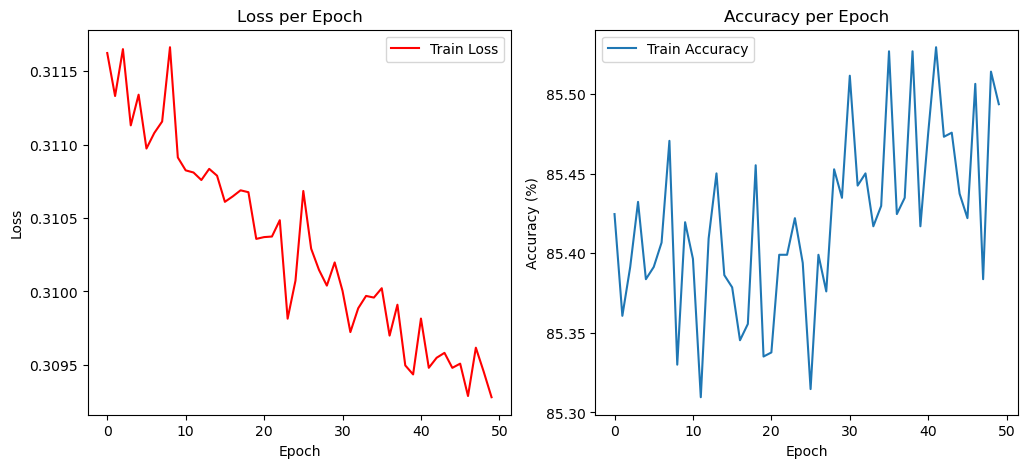

In [132]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, 'r', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()

plt.show()


### Conclusion
Hence we can say that by comparing the above two models (made using python and Pytorch), we can see that both the models perform almost the same and have similar accuracies. Hence our implementation is correct. 